# VERSIÓN 2

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from keras.utils import to_categorical

In [2]:
# Se cargan las imágenes del dataset MNIST
(training_images, training_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Función que visualiza un ejemplo
def visualize(sample):
  image = training_images[sample]
  fig = plt.figure
  plt.imshow(image.reshape(28,28), cmap='gray')
  plt.show()

## PREPARACIÓN DE LOS DATOS

In [3]:
# Se cambia el tipo de los datos a float32
training_images = training_images.astype("float32")
test_images = test_images.astype("float32")

# Las imágenes pasan de matriz 28x28 a vector 784x1
training_images = training_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

# Normalización: los datos pasan a tener un valor entre [0, 1]
training_images = training_images / 255
test_images = test_images / 255

## CONJUNTO DE VALIDACIÓN

In [4]:
# El conjunto de validación es el 20% del conjunto de entrenamiento
validation_images = training_images[-12000:]
validation_labels = training_labels[-12000:]

training_images = training_images[:48000]
training_labels = training_labels[:48000]

## ENTRENAMIENTO

In [6]:
model = Sequential()

# Se añaden las capas
model.add(Dense(10, activation='softmax', input_shape=(784,)))

# Se compila el modelo
hist = model.compile(
  optimizer='rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

# Early Stopping cuando val_loss deja de mejorar
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=0)

# Se entrena el modelo
start = time.time()

hist = model.fit(
  training_images,
  to_categorical(training_labels),
  epochs=100,
  batch_size=64,
  validation_data=(validation_images,to_categorical(validation_labels)),
  callbacks=[earlyStopping]
)

end = time.time()

# Se evalua la red neuronal
eval = model.evaluate(
  test_images,
  to_categorical(test_labels)
)

Epoch 1/100
750/750 [==============================] - 1s 2ms/step - loss: 0.5536 - accuracy: 0.8585 - val_loss: 0.3254 - val_accuracy: 0.9096
Epoch 2/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3254 - accuracy: 0.9095 - val_loss: 0.2899 - val_accuracy: 0.9187
Epoch 3/100
750/750 [==============================] - 1s 1ms/step - loss: 0.3006 - accuracy: 0.9168 - val_loss: 0.2823 - val_accuracy: 0.9210
Epoch 4/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2892 - accuracy: 0.9194 - val_loss: 0.2763 - val_accuracy: 0.9233
Epoch 5/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2826 - accuracy: 0.9216 - val_loss: 0.2741 - val_accuracy: 0.9260
Epoch 6/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2777 - accuracy: 0.9234 - val_loss: 0.2703 - val_accuracy: 0.9261
Epoch 7/100
750/750 [==============================] - 1s 1ms/step - loss: 0.2747 - accuracy: 0.9249 - val_loss: 0.2674 - val_accuracy: 0.9280

## PORCENTAJE DE ERROR

Porcentaje de error sobre el conjunto de entrenamiento: 7.41
Porcentaje de error sobre el conjunto de prueba: 7.46
Tiempo transcurrido: 8.84


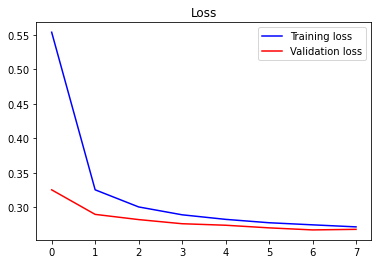

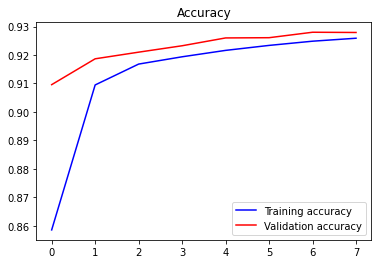

In [7]:

accuracy_val = eval[1]
error_val = (1 - accuracy_val)*100

accuracy_train = hist.history['accuracy'][-1]
error_train = (1 - accuracy_train)*100

print("Porcentaje de error sobre el conjunto de entrenamiento: "+str(round(error_train,2)))
print("Porcentaje de error sobre el conjunto de prueba: "+str(round(error_val,2)))
print("Tiempo transcurrido: "+str(round(end - start,2)))

epochs = range(len(hist.history['accuracy']))
loss = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, loss_val, 'r', label='Validation loss')
plt.title("Loss")
plt.legend()
plt.show()
accuracy = hist.history['accuracy']
accuracy_val = hist.history['val_accuracy']
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, accuracy_val, 'r', label='Validation accuracy')
plt.legend()
plt.title("Accuracy")
plt.show()

## VISUALIZACIÓN DE LA RED

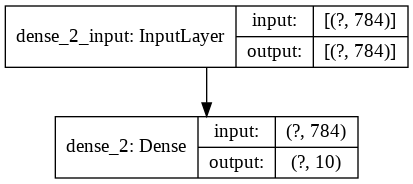

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)